# 5. Model Selection

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier

**Model selection** is the process of *choosing* the most appropriate machine learning or statistical model from a set of candidate tools that *best* fits the data and produces *accurate* predictions on unseen data. As expected, the choice of model can significantly impact the *performance* and generalization ability of the final solution. 

Once performed Data Pre-Processing and Feature Analysis, it is necessary to ***split*** the dataset into *train* and *test* sets, and then choose the *candidate* algorithms suitable for text classification. For the project, I decide to implement the most popular machine learning models such as: Naive Bayes *(NB)*, Multinomial Naive Bayes *(MNB)*, Logistic Regression *(LR)*, Suppot Vector Machine *(SVM)*, k-Nearest-Neighbors *(kNN)*, Decision Tree *(DT)*, RandomForest *(RF)*, Gradient Boosting *(GB)*, and XGBoost *(XGB)*. 

In [2]:
# Models Dependencies
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

To compare the performance of different models, it is important to use appropriate metrics:

* ***Accuracy*** measures the proportion of all *positive* predictions out of *all* predictions: <br><br> $$\frac{(tp + tn)}{(tp + tn + fp + fn)} . $$ <br>

* ***Precision*** represents the proportion of *correctly* predicted *positive* instances out of *all* instances that the model predicted as positive. It reveals how **accurate** the positive predictions are: <br><br> $$\frac{tp}{(tp + fp)} . $$ <br>

* ***Recall*** indicates the proportion of *correctly* predicted *positive* instances out of *all* actual *positive* instances. The **sensitivity** indicates how well the model captures all positive instances <br><br> $$\frac{tp}{(tp + fn)} . $$ <br>  

* ***F1-Score*** is the harmonic *mean* of precision and recall: <br><br> $$2 \times \frac{(precision \times recall)}{(precision + recall)} . $$ <br>

* ***Support*** is the number of actual *occurrences* of each class in the dataset. 

In particular: ***tp =*** *true positive* prediction, ***tn =*** *true negative* prediction, ***fp =*** *false positive* prediction, and ***fn =*** *false negative* prediction.

Once compared the execution of different algorithms using evaluation metrics and cross-validation results, evaluate the *selected* model on the ***test*** set to estimate its performance on unseen data and interpret the results. 

In [3]:
# Read Pre-processed Data
df = pd.read_csv('rws_eda.csv')
df = df.drop(df.columns[0], axis = 1)
df.head(1)

,Clean Title,Clean Content,Rating,Sentiment,Target
0,second time buying headphones overall value money,lost first pair replaced really like fit sound...,4,Positive,2


Let's start evaluating each selected classifier on the ***entire*** *dataset* to gain insights regarding the ***overall*** *performance* and *accuracy* of each machine learning model. As performed in the previous sections, it is necessary to *convert* pre-processed data into TF-IDF features and perform a *word-level* analysis considering unigrams, bigrams, and trigrams: 

In [4]:
# Word-Level Instance 
tfidf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 3), max_features = 2500)
# TF-IDF of features
X = tfidf.fit_transform(df['Clean Content']).toarray()
# Target
y = df['Sentiment']

Let's perform ***cross-validation*** to assess the *performance* of each model and to ensure that the evaluation is *robust* and ***not*** overly *dependent* on a specific data split for training and testing. Considering **5-fold** cross-validation, the dataset is divided into 3 subsets, meaning that train-test process is repeated 3 times as follows:

* *Split* dataset into 3 folds.
* *Iteration 1:* Fold 1 as the testing set, and Folds 2-5 as the training set.
* *Iteration 2:* Fold 2 as the testing set, and Folds 1, 3, 4, and 5 as the training set.
* *Iteration 3:* Fold 3 as the testing set, and Folds 1, 2, 4, and 5 as the training set.

with the purpose of getting a ***more*** *robust* estimate of the model's performance compared to a single train-test split. The final performance metric of the model is usually the *average* of accuracy. 

In [5]:
# Classification Models Object
NB = GaussianNB()
MNB = MultinomialNB()
LR = LogisticRegression(random_state = 1)
SVM = SVC()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()
XGB = xgb.XGBClassifier()

In [6]:
classifiers = {0: 'Naive Bayes', 
                1: 'Multinomial Naive Bayes',
                2: 'Logistic Regression',
                3: 'Support Vector Machine',
                4: 'KNN',
                5: 'Decision Tree',
                6: 'Random Forest',
                7: 'Gradient Boosting',
                8: 'XGBoost'}

models = [NB, MNB, LR, SVM, KNN, DT, RF, GB, XGB]

# Suppress the specific warning
warnings.filterwarnings('ignore', category = FutureWarning)

# Cross-Validation
print('---------CROSS VALIDATION---------')
cross = []
# Cross-Validation
for i, model in enumerate(models[:8]):
    scores = cross_val_score(model, X, y, cv = 3, scoring = 'accuracy')
    mean_score = scores.mean()
    #print(f'{classifiers[i]} Trial Accuracy: {mean_score:.4f}')
    cross.append({'Model': classifiers[i], 'Accuracy': mean_score})

df_cross = pd.DataFrame(cross)
df_cross

---------CROSS VALIDATION---------


,Model,Accuracy
0,Naive Bayes,0.870469
1,Multinomial Naive Bayes,0.870172
2,Logistic Regression,0.870172
3,Support Vector Machine,0.870172
4,KNN,0.870172
5,Decision Tree,0.819667
6,Random Forest,0.870172
7,Gradient Boosting,0.829768


In the previous Cross-Validation I decide to ***not*** consider *XGB* classifier because 3 fits out of 3 *failed*, meaning that the score on these train-test partitions for these parameters will be set to *nan*. 

In [7]:
# Split Data 
train, test = train_test_split(df, test_size = 0.3, random_state = 42)

# Vectorization 
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train['Clean Content']).toarray()
X_test = tfidf.transform(test['Clean Content']).toarray()

y_train = train['Target']
y_test = test['Target']

print(f'Train Set Shape: {train.shape}')
print(f'Test Set Shape: {test.shape}')

Train Set Shape: (70, 5)
Test Set Shape: (30, 5)


### Train Set

Let's now evaluate how well each selected model is performing in terms of *accuracy*, micro-averaged *precision*, weighted average *recall*, and weighted average *F1-score* on the ***training*** set:

In [8]:
print('---------------------TRAIN SET----------------------')
results = []
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    # Training Set Metrics
    accuracy = model.score(X_train, y_train)
    precision = precision_score(y_train, model.predict(X_train), average = 'micro')
    recall = recall_score(y_train, model.predict(X_train), average = 'weighted')
    f1 = f1_score(y_train, model.predict(X_train), average = 'weighted')
    results.append({'Model': classifiers[i], 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})

df_results = pd.DataFrame(results)
df_results

---------------------TRAIN SET----------------------


,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,1.000000,1.000000,1.000000,1.000000
1,Multinomial Naive Bayes,0.842857,0.842857,0.842857,0.770986
2,Logistic Regression,0.842857,0.842857,0.842857,0.770986
3,Support Vector Machine,0.900000,0.900000,0.900000,0.871848
4,KNN,0.828571,0.828571,0.828571,0.763839
5,Decision Tree,1.000000,1.000000,1.000000,1.000000
6,Random Forest,1.000000,1.000000,1.000000,1.000000
7,Gradient Boosting,1.000000,1.000000,1.000000,1.000000
8,XGBoost,1.000000,1.000000,1.000000,1.000000


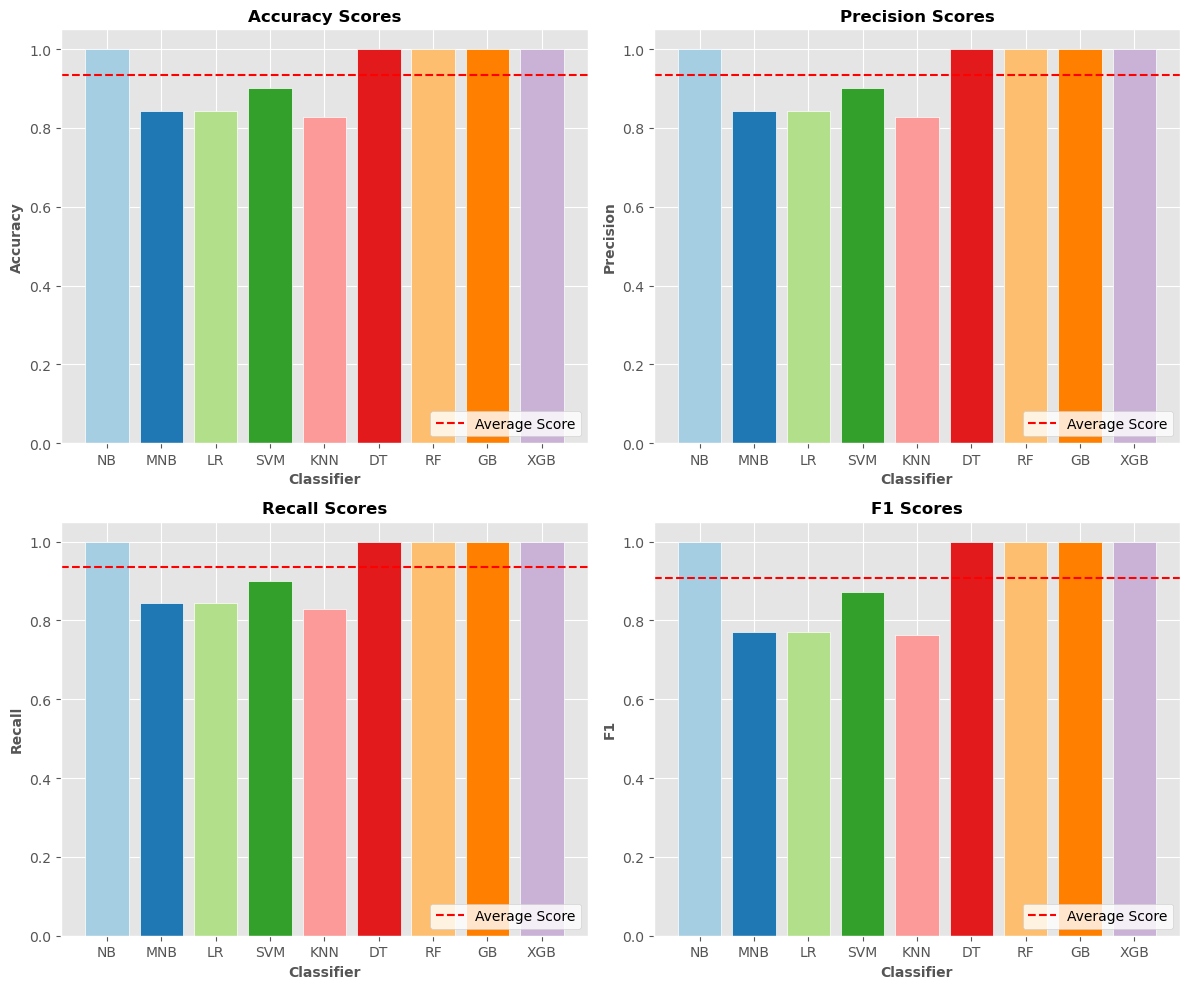

In [9]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
models = ['NB', 'MNB', 'LR', 'SVM', 'KNN', 'DT', 'RF', 'GB', 'XGB']
palette = sns.color_palette('Paired')

fig, axs = plt.subplots(2, 2, figsize = (12, 10))
axs = axs.ravel()

for i, metric in enumerate(metrics):
    axs[i].bar(df_results['Model'], df_results[metric], color = palette, edgecolor = 'white')
    axs[i].set_title(f'{metric} Scores', fontweight = 'bold', fontsize = 12)
    axs[i].set_xlabel('Classifier', fontweight = 'bold', fontsize = 10)
    axs[i].set_ylabel(metric, fontweight = 'bold', fontsize = 10)
    axs[i].set_xticks(range(len(df_results['Model'])))  
    axs[i].set_xticklabels(models)
    
    avg_score = df_results[metric].mean()
    axs[i].axhline(y = avg_score, color = 'red', linestyle = 'dashed', label = 'Average Score')
    axs[i].legend(loc = 'lower right').get_frame().set_facecolor('white')
    
plt.tight_layout()
plt.show()

Since the accuracy measures the proportion of correctly predicted instances out of the total instances, the ***higher*** *accuracy* the ***better*** overall *performance*. However, it might not be sufficient for imbalanced datasets. According to our train dataset, 5 out of 9 models exhibit an accuracy greater than the average score. 
Regarding the accuracy of positive predictions, an ***higher*** *precision* means that the model makes ***fewer*** false positive *errors*: in this case, 5 out of 9 models exhibit a precision greater than the average score. 
Since recall focuses on how well the model captures positive instances, an ***higher*** *recall* means the model can find ***most*** of the *positive* instances: again, only 5 models exhibit a recall greater than the average score. 
Considering the balance between precision and recall, 5 out of 9 models exhibit a *F1-score* ***greater*** than the average score. 

According to our **training** set, we can conclude that Naive Bayes *(NB)*, Decision Tree *(DT)*, Random Forest *(RF)*, Gradient Boosting *(GB)*, and KGBoost *(XGB)* models exhibit the ***highest*** *score* for each metric considered. 

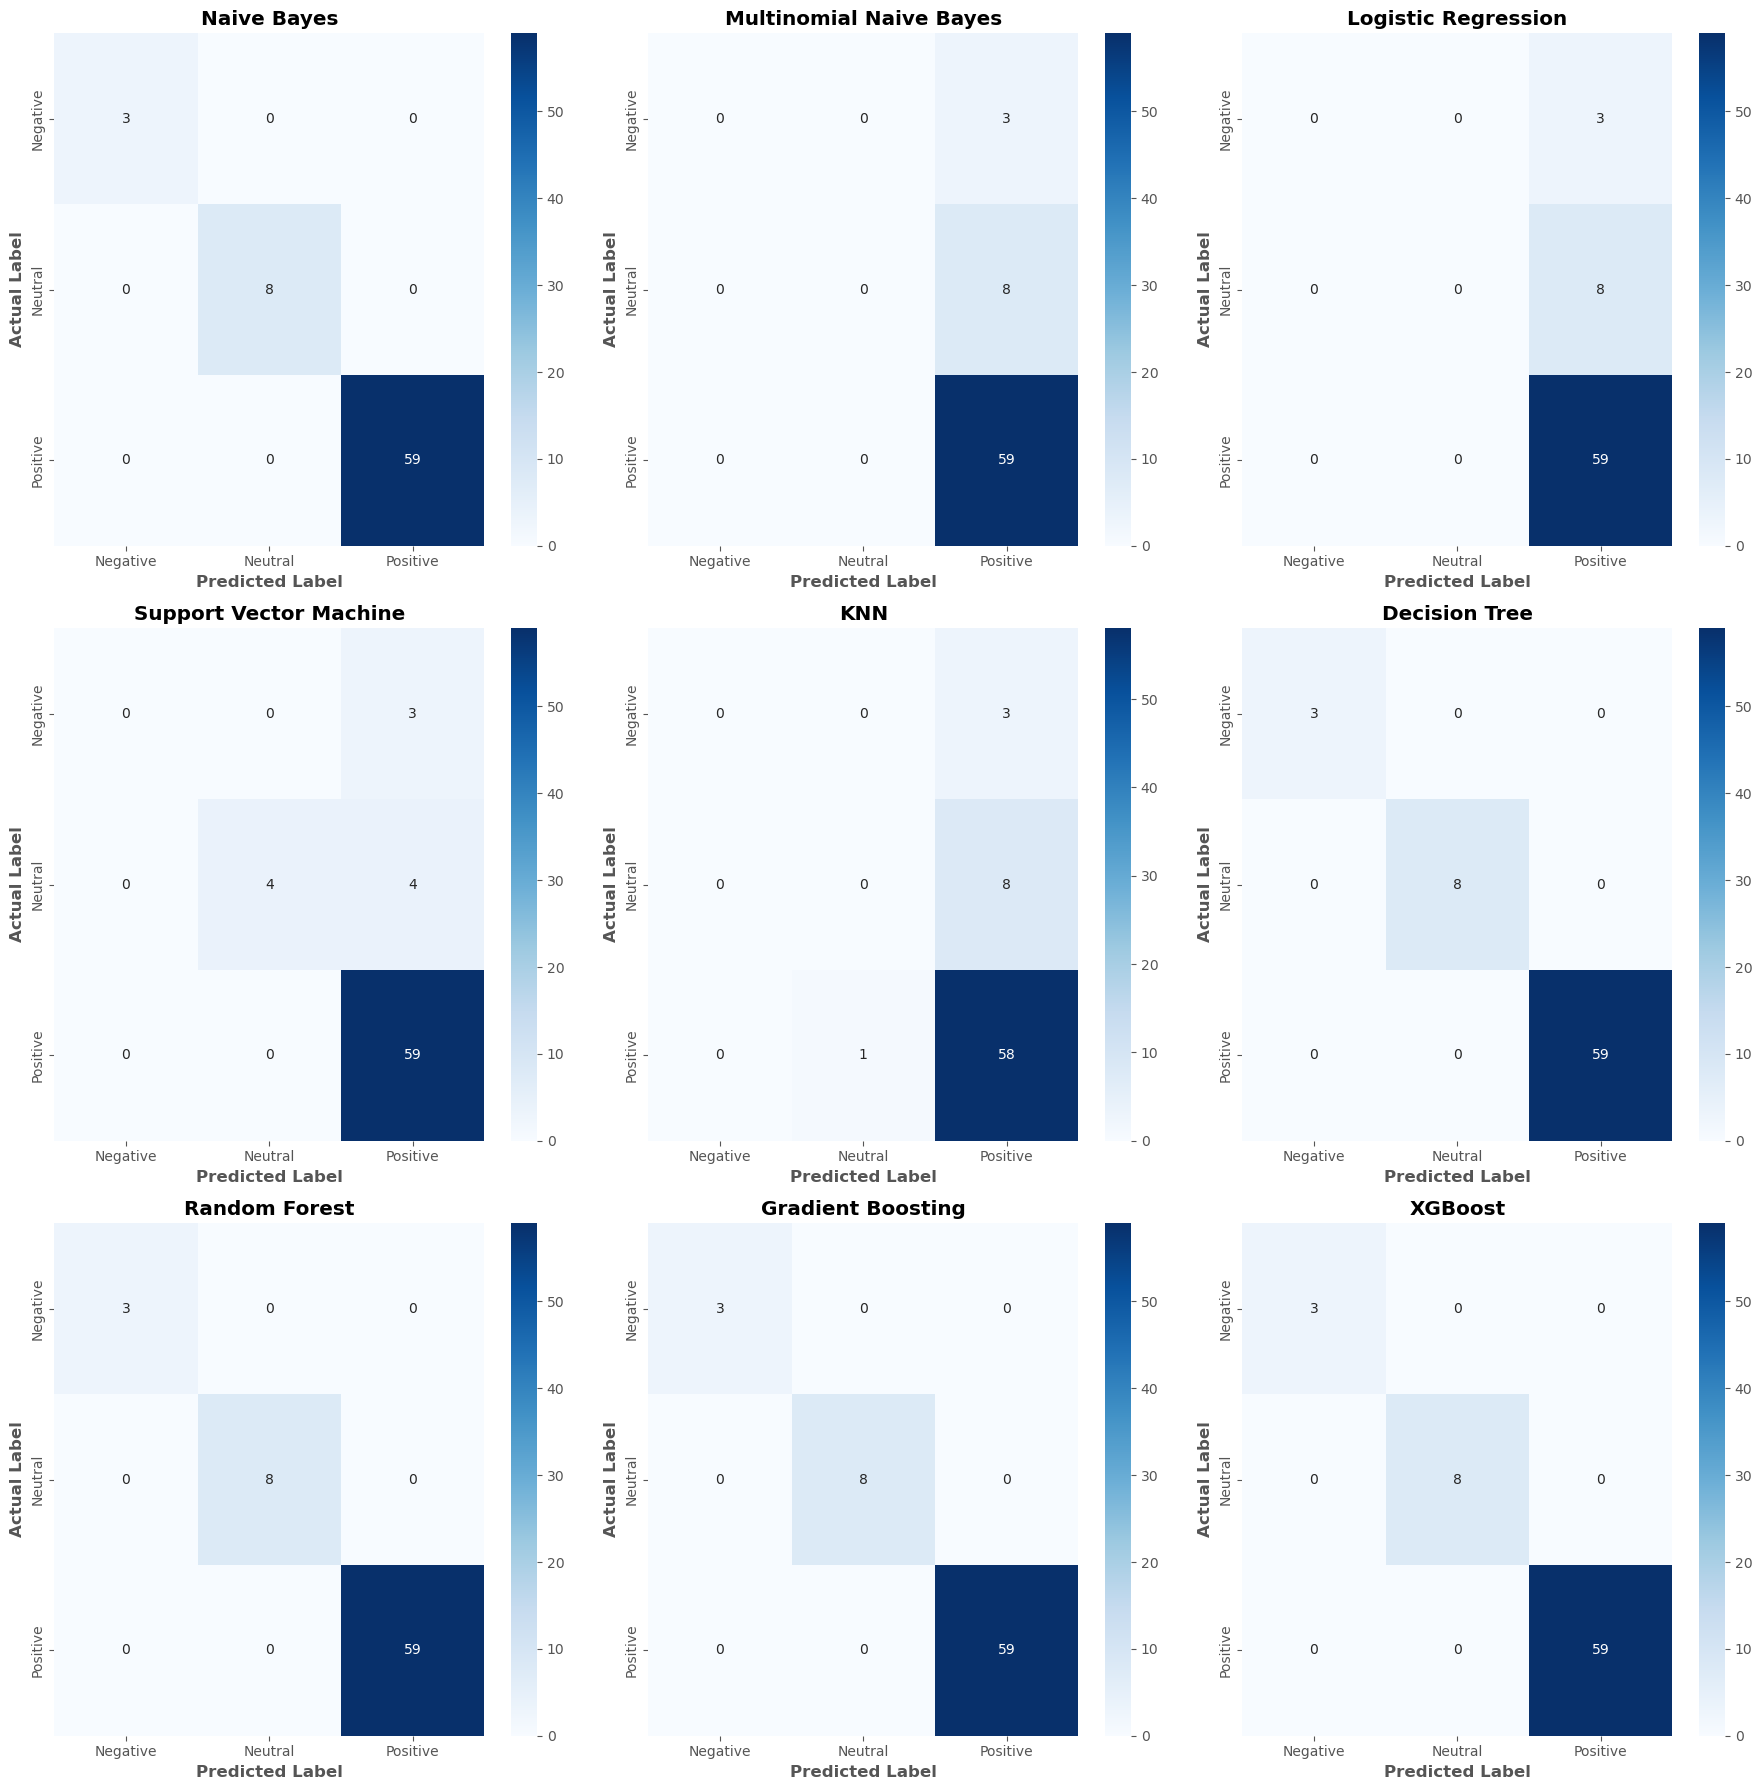

In [10]:
models = [NB, MNB, LR, SVM, KNN, DT, RF, GB, XGB]

# Confusion Matrix
plt.figure(figsize = (18, 18))

for i, model in enumerate(models, 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    
    conf_matrix = confusion_matrix(y_train, y_pred)
    class_names = ['Negative', 'Neutral', 'Positive']
    
    plt.subplot(3, 3, i)
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
    #plt.title(f'Confusion Matrix - {model.__class__.__name__}', fontweight='bold')
    plt.title(f'{classifiers[i-1]}', fontweight = 'bold')
    plt.xlabel('Predicted Label', fontweight = 'bold')
    plt.ylabel('Actual Label', fontweight = 'bold')
    
plt.subplots_adjust(hspace = 0.8, wspace = 0.8)
plt.tight_layout()
plt.show()

### Test Set

In [11]:
print('---------------------TEST SET----------------------')
test_results = []
for i, model in enumerate(models):
    # Testing Set Metrics
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, model.predict(X_test), average = 'micro')
    recall = recall_score(y_test, model.predict(X_test), average = 'weighted')
    f1 = f1_score(y_test, model.predict(X_test), average = 'weighted')
    test_results.append({'Model': classifiers[i], 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})

test_df_results = pd.DataFrame(test_results)
test_df_results

---------------------TEST SET----------------------


C:\Users\debby\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.933333,0.933333,0.933333,0.901149
1,Multinomial Naive Bayes,0.933333,0.933333,0.933333,0.901149
2,Logistic Regression,0.933333,0.933333,0.933333,0.901149
3,Support Vector Machine,0.933333,0.933333,0.933333,0.901149
4,KNN,0.933333,0.933333,0.933333,0.901149
5,Decision Tree,0.800000,0.800000,0.800000,0.847863
6,Random Forest,0.933333,0.933333,0.933333,0.901149
7,Gradient Boosting,0.866667,0.866667,0.866667,0.866667
8,XGBoost,0.933333,0.933333,0.933333,0.901149


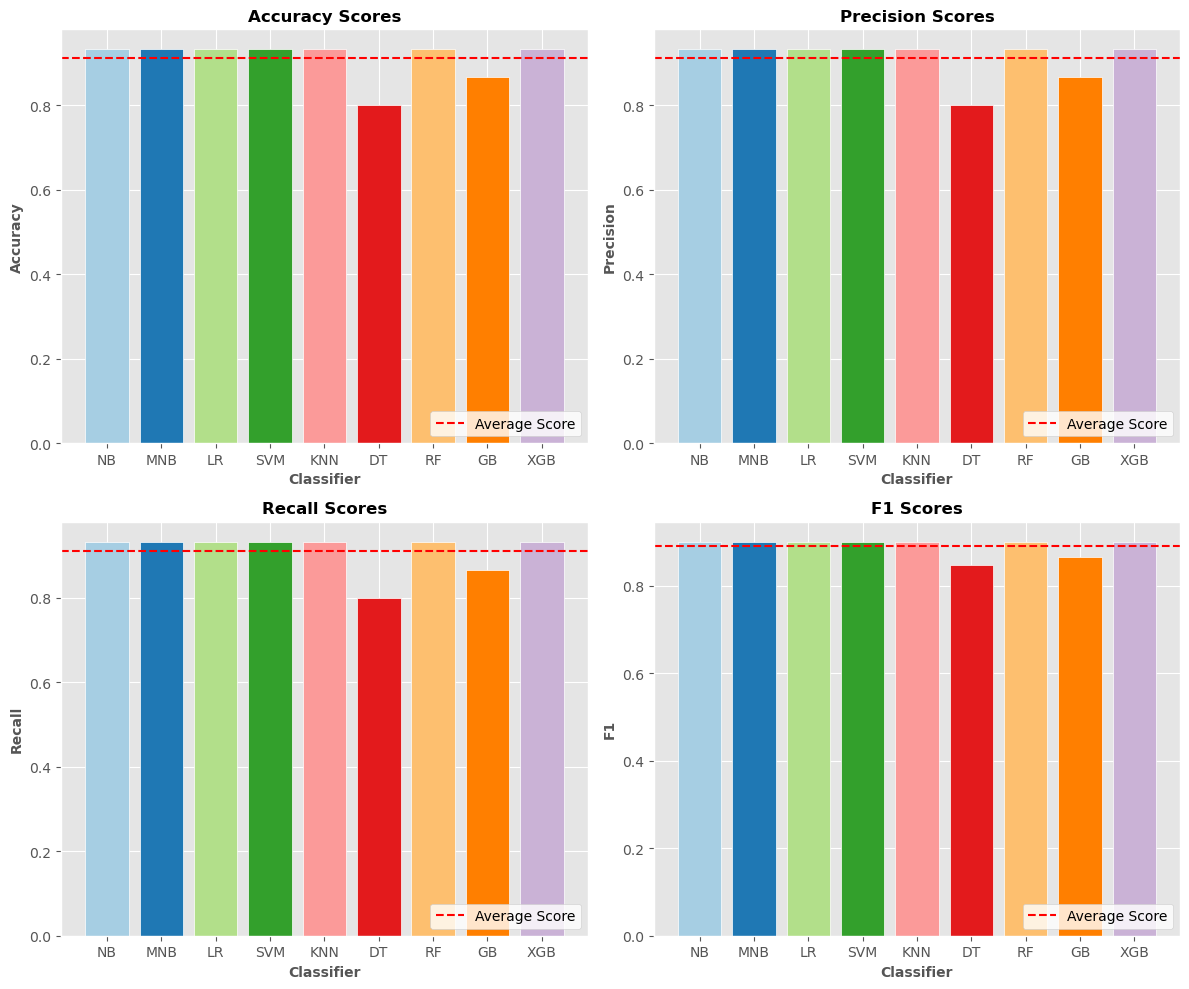

In [12]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
models = ['NB', 'MNB', 'LR', 'SVM', 'KNN', 'DT', 'RF', 'GB', 'XGB']
palette = sns.color_palette('Paired')

fig, axs = plt.subplots(2, 2, figsize = (12, 10))
axs = axs.ravel()

for i, metric in enumerate(metrics):
    axs[i].bar(test_df_results['Model'], test_df_results[metric], color = palette, edgecolor = 'white')
    axs[i].set_title(f'{metric} Scores', fontweight = 'bold', fontsize = 12)
    axs[i].set_xlabel('Classifier', fontweight = 'bold', fontsize = 10)
    axs[i].set_ylabel(metric, fontweight = 'bold', fontsize = 10)
    axs[i].set_xticks(range(len(test_df_results['Model'])))  
    axs[i].set_xticklabels(models)
    
    avg_score = test_df_results[metric].mean()
    axs[i].axhline(y = avg_score, color = 'red', linestyle = 'dashed', label = 'Average Score')
    axs[i].legend(loc = 'lower right').get_frame().set_facecolor('white')
    
plt.tight_layout()
plt.show()

Inspecting the results, we can infer that most of the models performing well on the training set, exihbit also an high score on the *testing* set, with the exception of the Decision Tree *(DT)* and Gradient Boosting *(GB)*. 
According to our **test** set, we can conclude that also Logistic Regression *(LR)*, Support Vector Machine *(SVM)*, and *KNN* models exhibit the ***highest*** *score* for each metric considered. 

In [13]:
sent_2 = test['Target'].value_counts().get(2, 0)
print("Number of rows with Pos Sentiment:", sent_2)
sent_1 = test['Target'].value_counts().get(1, 0)
print("Number of rows with Neu Sentiment:", sent_1)
sent_0 = test['Target'].value_counts().get(0, 0)
print("Number of rows with Neg Sentiment:", sent_0)

Number of rows with Pos Sentiment: 28
Number of rows with Neu Sentiment: 2
Number of rows with Neg Sentiment: 0


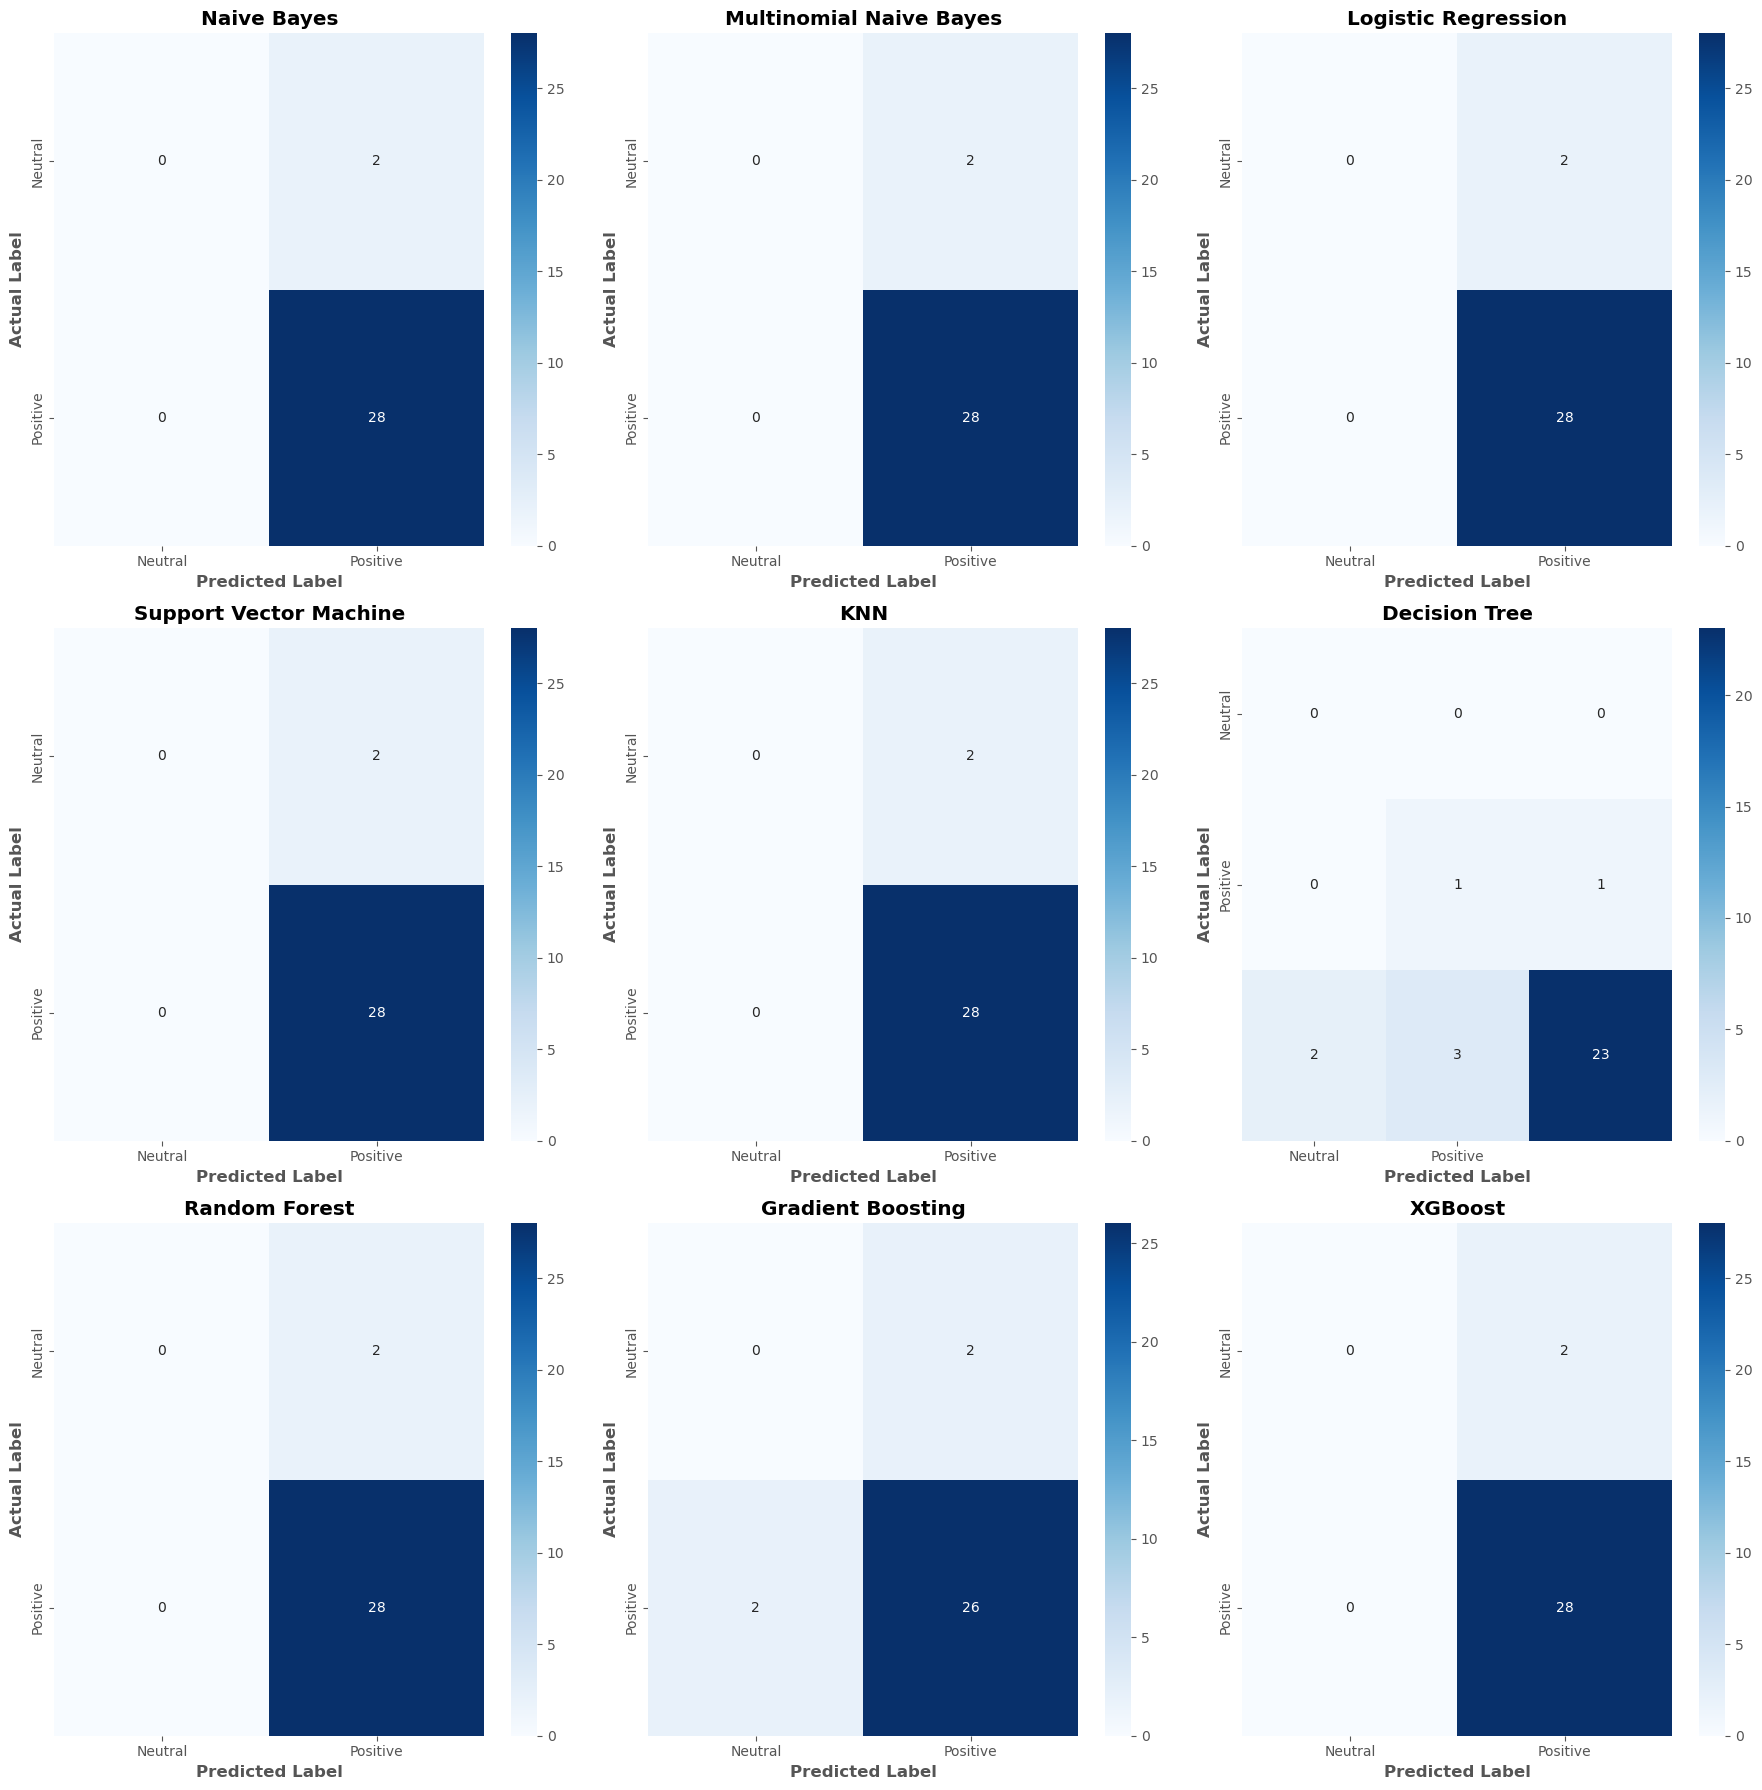

In [14]:
models = [NB, MNB, LR, SVM, KNN, DT, RF, GB, XGB]

# Confusion Matrix
plt.figure(figsize = (18, 18))

for i, model in enumerate(models, 1):
    y_pred = model.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    #class_names = ['Negative', 'Neutral', 'Positive']
    class_names = ['Neutral', 'Positive']
    
    plt.subplot(3, 3, i)
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
    plt.title(f'{classifiers[i-1]}', fontweight = 'bold')
    plt.xlabel('Predicted Label', fontweight = 'bold')
    plt.ylabel('Actual Label', fontweight = 'bold')
    
plt.subplots_adjust(hspace = 0.8, wspace = 0.8)
plt.tight_layout()
plt.show()